In [1]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
import matplotlib
import cov_utils as cu
import cl_utils as clu
import healpy as hp
import pymaster as nmt
import scipy as sp
import anglib as al
import time
import os


In [2]:
def pos_def(cov):
    try:
        np.linalg.cholesky(cov)
        print('is pos def')
    except:
        print('is not positive difinite')

def is_symmetric(cov):
    test = (cov == cov.T)
    if np.where(test==False)[0].size == 0:
        print ('is symmetric')
    else :
        print('not symmetric')

def min_max(cov):
    print(cov.min(), cov.max())

def plot_cor(cov, vmin=-0.01, vmax=0.01):
    cor = cu.cov_to_corr(cov)
    fig, ax = plt.subplots(1,2, figsize=(5,5),gridspec_kw={"width_ratios":[1, 0.05]})
    im = ax[0].imshow(cor, vmin=vmin, vmax=vmax)
    ax[0].set_title('')
    cb = fig.colorbar(im, cax=ax[1])
    plt.subplots_adjust(wspace=0.05, hspace=0.05)
    # plt.savefig("plots/cor_3x2_fullsky_fs2_test_zoom.pdf", bbox_inches='tight')
    plt.show()

def coupling_matrix(bin_scheme, mask, wkspce_name):
    """
    Compute the mixing matrix for coupling spherical harmonic modes using
    the provided binning scheme and mask.

    Parameters:
    -----------
    bin_scheme : nmt_bins
        A binning scheme object defining the bins for the coupling matrix.

    mask : nmt_field
        A mask object defining the regions of the sky to include in the computation.

    wkspce_name : str
        The file name for storing or retrieving the computed workspace containing
        the coupling matrix.

    Returns:
    --------
    nmt_workspace
        A workspace object containing the computed coupling matrix.

    Notes:
    ------
    This function computes the coupling matrix necessary for the pseudo-Cl power
    spectrum estimation using the NmtField and NmtWorkspace objects from the
    Namaster library.

    If the workspace file specified by 'wkspce_name' exists, the function reads
    the coupling matrix from the file. Otherwise, it computes the matrix and
    writes it to the file.

    Example:
    --------
    # Generate a linear binning scheme for an NSIDE of 64, starting from l=10, with bin width of 20
    bin_scheme = linear_lmin_binning(NSIDE=64, lmin=10, bw=20)

    # Define the mask
    mask = nmt.NmtField(mask, [mask])

    # Compute the coupling matrix and store it in 'coupling_matrix.bin'
    coupling_matrix = coupling_matrix(bin_scheme, mask, 'coupling_matrix.bin')
    """
    print('Compute the mixing matrix')
    start = time.time()
    fmask = nmt.NmtField(mask, [mask]) # nmt field with only the mask
    w = nmt.NmtWorkspace()
    if os.path.isfile(wkspce_name):
        print('Mixing matrix has already been calculated and is in the workspace file : ', wkspce_name, '. Read it.')
        w.read_from(wkspce_name)
    else :
        print('The file : ', wkspce_name, ' does not exists. Calculating the mixing matrix and writing it.')
        w.compute_coupling_matrix(fmask, fmask, bin_scheme)
        w.write_to(wkspce_name)
    print('Done computing the mixing matrix. It took ', time.time()-start, 's.')
    return w

In [4]:
gcauto_nonoise = np.load('output/posdef_test_GCauto_6ED_fs2mask_nonoise.npy')
gcauto_wnoise = np.load('output/posdef_test_GCauto_6ED_fs2mask.npy')
firstchain_2x2 = np.load('/home/hidra2/gouyou/euclid/nl_bias_flagship/data/covariance/FS2_2x2_firstchain_6ED_NS1024_LMIN10_BW50.npy')
nonoise_2x2 = np.load('output/posdef_test_2x2_6ED_fs2mask_nonoise.npy')
wnoise_2x2 = np.load('output/posdef_test_2x2_6ED_fs2mask_wnoise.npy')
wnoise_ggl = np.load('output/posdef_test_ggl_6ED_fs2mask_wnoise.npy')
fullsky_ggl = np.load('output/posdef_test_ggl_6ED_fullsky.npy')
fs2_ns32_ggl = np.load('output/posdef_test_ggl_6ED_fs2_ns32.npy')
fs2_ns32_gcauto_wl = np.load('output/posdef_test_gcauto_wl_6ED_fs2_ns32.npy')
fs2_ns32_gcauto_wlauto = np.load('output/posdef_test_gcauto_wlauto_6ED_fs2_ns32.npy')
fs2_ns32_wlauto = np.load('output/posdef_test_wlauto_6ED_fs2_ns32.npy')
fs2_ns32_gcauto = np.load('output/posdef_test_gcauto_6ED_fs2_ns32.npy')
fullsky_ns32_wlauto = np.load('output/posdef_test_wlauto_6ED_fullsky_ns32.npy')
fullsky_ns32_gcauto = np.load('output/posdef_test_gcauto_6ED_fullsky_ns32.npy')
fullsky_ns8_wlauto = np.load('output/posdef_test_wlauto_6ED_fullsky_ns8.npy')
fullsky_ns8_gcauto = np.load('output/posdef_test_gcauto_6ED_fullsky_ns8.npy')
fs2_ns8_wlauto = np.load('output/posdef_test_wlauto_6ED_fs2_ns8.npy')
fs2_ns8_gcauto = np.load('output/posdef_test_gcauto_6ED_fs2_ns8.npy')
halffsky_ns8_wlauto = np.load('output/posdef_test_wlauto_6ED_halffsky_ns8.npy')
halffsky_ns8_gcauto = np.load('output/posdef_test_gcauto_6ED_halffsky_ns8.npy')
almostfsky_ns8_wlauto = np.load('output/posdef_test_wlauto_6ED_almostfullsky_ns8.npy')
almostfsky_ns8_gcauto = np.load('output/posdef_test_gcauto_6ED_almostfullsky_ns8.npy')
fs2_ns8_gcX = np.load('output/posdef_test_gcX_6ED_fs2_ns8.npy')




In [5]:
pos_def(gcauto_nonoise)
pos_def(gcauto_wnoise)
pos_def(firstchain_2x2)
pos_def(nonoise_2x2)
pos_def(wnoise_2x2)
pos_def(wnoise_ggl)
pos_def(fullsky_ggl)
pos_def(fs2_ns32_ggl)
pos_def(fs2_ns32_gcauto_wl)
pos_def(fs2_ns32_gcauto_wlauto)
pos_def(fs2_ns32_wlauto)
pos_def(fs2_ns32_gcauto)
pos_def(fullsky_ns32_wlauto)
pos_def(fullsky_ns32_gcauto)
pos_def(fullsky_ns8_wlauto)
pos_def(fullsky_ns8_gcauto)
pos_def(fs2_ns8_wlauto)
pos_def(fs2_ns8_gcauto)
pos_def(halffsky_ns8_gcauto)
pos_def(halffsky_ns8_wlauto)
pos_def(almostfsky_ns8_gcauto)
pos_def(almostfsky_ns8_wlauto)
pos_def(fs2_ns8_gcX)

is pos def
is pos def
is not positive difinite
is not positive difinite
is not positive difinite
is not positive difinite
is pos def
is not positive difinite
is not positive difinite
is not positive difinite
is not positive difinite
is pos def
is pos def
is pos def
is pos def
is pos def
is not positive difinite
is pos def
is pos def
is not positive difinite
is pos def
is pos def
is pos def


In [47]:
is_symmetric(fs2_ns32_ggl)
is_symmetric(fullsky_ggl)
is_symmetric(fs2_ns32_gcauto_wl)

is symmetric
is symmetric
is symmetric


In [44]:
for i in range(fs2_ns32_ggl.shape[0]):
    for j in range(fs2_ns32_ggl.shape[0]):
        if fs2_ns32_ggl[i,j] != fs2_ns32_ggl.T[i,j]:
            print(False)


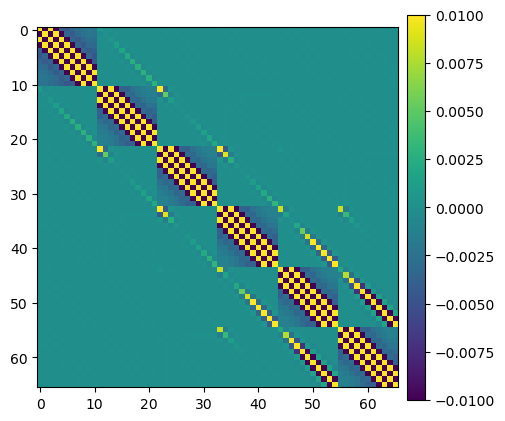

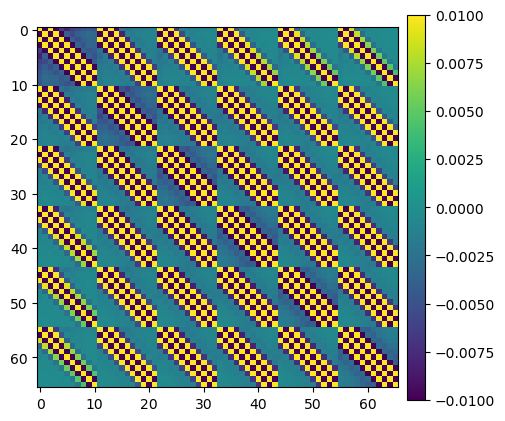

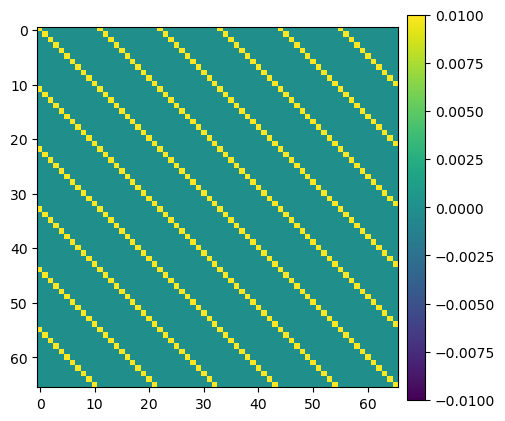

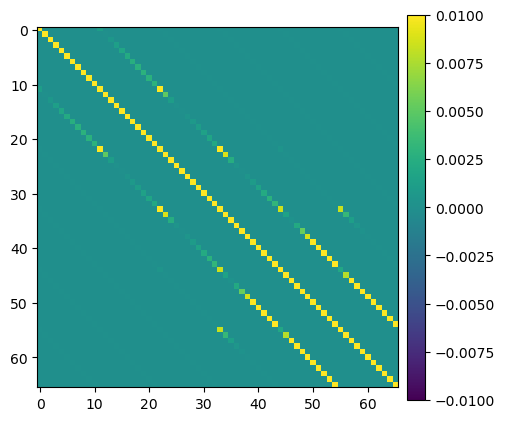

In [71]:
plot_cor(fs2_ns32_gcauto)
plot_cor(fs2_ns32_wlauto)
# plot_cor(fs2_ns32_ggl)
plot_cor(fullsky_ns32_wlauto)
plot_cor(fullsky_ns32_gcauto)

In [75]:
min_max(fs2_ns32_gcauto)
min_max(fs2_ns32_wlauto)
min_max(fullsky_ns32_wlauto)

-2.6465865801426177e-11 7.115831044480293e-11
-6.239206721799495e-16 1.6510658139393986e-15
-3.128357239649011e-25 1.2825873803600512e-16


In [80]:
print(np.linalg.det(fs2_ns32_gcauto))
print(np.linalg.det(fs2_ns32_wlauto))
print(np.linalg.det(fullsky_ns32_wlauto))
print(np.linalg.det(gcauto_nonoise))

0.0
-0.0
0.0
0.0


In [105]:
fsky_map_ns32 = hp.read_map('../data/mask/fullsky_mask_binary_NS32.fits')
fsky_map_ns8 = hp.ud_grade(fsky_map_ns32, 8)
# hp.write_map('../data/mask/fullsky_mask_binary_NS8.fits', fsky_map_ns8)
binning = clu.linear_lmin_binning(NSIDE=8, lmin=10, bw=5)
print(binning.get_effective_ells())

# Compute coupling matrix and save to file
w_fname = '../data/nmt_workspace/fullsky_NmtWorkspace_NS8_LMIN10_BW5.fits'
w = coupling_matrix(binning, fsky_map_ns8, w_fname)

fs2_map_ns32 = hp.read_map('../data/mask/flagship2_mask_binary_NS32.fits')
fs2_map_ns8 = hp.ud_grade(fs2_map_ns32, 8)
hp.write_map('../data/mask/flagship2_mask_binary_NS8.fits', fs2_map_ns8)
binning = clu.linear_lmin_binning(NSIDE=8, lmin=10, bw=5)
print(binning.get_effective_ells())

# Compute coupling matrix and save to file
w_fname = '../data/nmt_workspace/flagship2_NmtWorkspace_NS8_LMIN10_BW5.fits'
w = coupling_matrix(binning, fs2_map_ns8, w_fname)



setting the output map dtype to [dtype('float64')]


[12. 17.]
Compute the mixing matrix
The file :  ../data/nmt_workspace/flagship2_NmtWorkspace_NS8_LMIN10_BW5.fits  does not exists. Calculating the mixing matrix and writing it.
Done computing the mixing matrix. It took  0.04772615432739258 s.


In [206]:
almostfullsky_map_ns8 = np.zeros_like(fsky_map_ns8)
almostfullsky_map_ns8[:int(almostfullsky_map_ns8.size/2)] = 1.
# hp.mollview(almostfullsky_map_ns8)

# hp.write_map('../data/mask/halffsky_mask_binary_NS8.fits', almostfullsky_map_ns8)
binning = clu.linear_lmin_binning(NSIDE=8, lmin=10, bw=5)
print(binning.get_effective_ells())

# Compute coupling matrix and save to file
w_fname = '../data/nmt_workspace/halffsky_NmtWorkspace_NS8_LMIN10_BW5.fits'
w = coupling_matrix(binning, almostfullsky_map_ns8, w_fname)

[12. 17.]
Compute the mixing matrix
Mixing matrix has already been calculated and is in the workspace file :  ../data/nmt_workspace/halffsky_NmtWorkspace_NS8_LMIN10_BW5.fits . Read it.
Done computing the mixing matrix. It took  0.125077486038208 s.


setting the output map dtype to [dtype('float64')]


[12. 17.]
Compute the mixing matrix
Mixing matrix has already been calculated and is in the workspace file :  ../data/nmt_workspace/almostfullsky_NmtWorkspace_NS8_LMIN10_BW5.fits . Read it.
Done computing the mixing matrix. It took  0.07665491104125977 s.


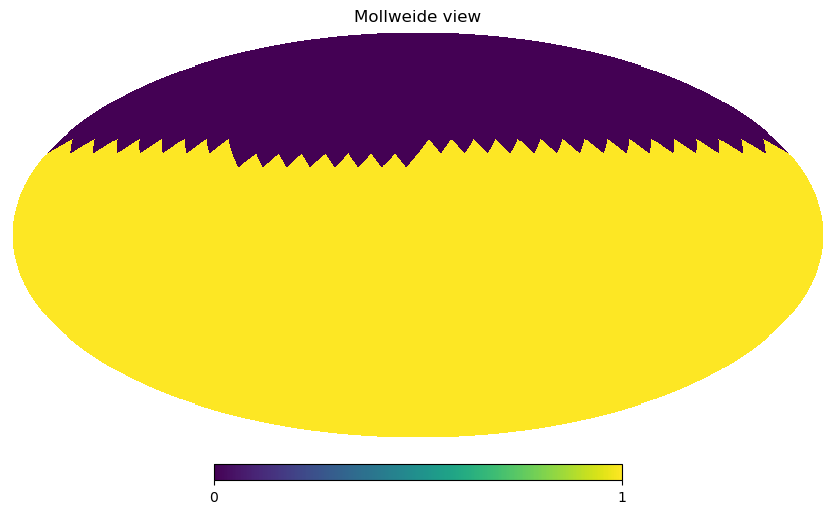

In [244]:
almostfullsky_map_ns8 = np.ones_like(fsky_map_ns8)
almostfullsky_map_ns8[:int(almostfullsky_map_ns8.size/2)-200] = 0
# hp.mollview(almostfullsky_map_ns8)

hp.write_map('../data/mask/almostfullsky_mask_binary_NS8.fits', almostfullsky_map_ns8, overwrite=True)
binning = clu.linear_lmin_binning(NSIDE=8, lmin=10, bw=5)
print(binning.get_effective_ells())

# Compute coupling matrix and save to file
w_fname = '../data/nmt_workspace/almostfullsky_NmtWorkspace_NS8_LMIN10_BW5.fits'
w = coupling_matrix(binning, almostfullsky_map_ns8, w_fname)
hp.mollview(almostfullsky_map_ns8)

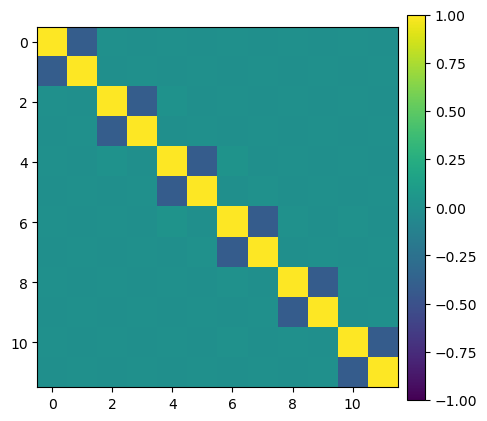

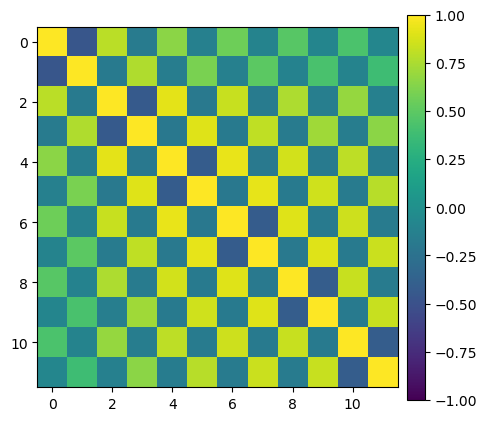

In [226]:
plot_cor(fs2_ns8_gcauto, vmin=-1, vmax=1)
plot_cor(fs2_ns8_wlauto, vmin=-1, vmax=1)

In [169]:
np.linalg.cholesky(np.float32(fs2_ns8_wlauto))

LinAlgError: Matrix is not positive definite

In [171]:
np.linalg.det(fs2_ns8_gcauto)

1.4010418338564925e-141

In [172]:
np.linalg.det(fs2_ns8_wlauto)

1.8736951585640285e-191

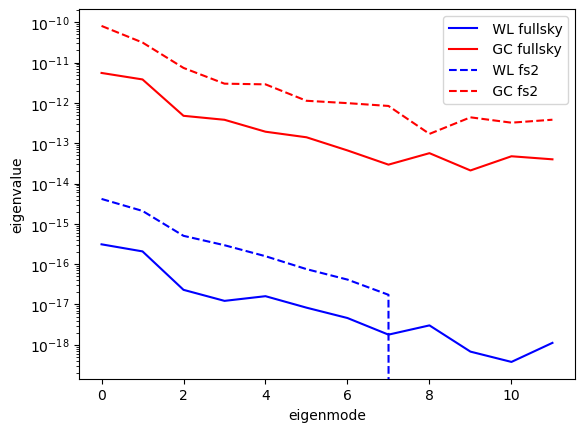

In [9]:
eigv_wl_fsky = np.linalg.eig(fullsky_ns8_wlauto)[0]
eigv_gc_fsky = np.linalg.eig(fullsky_ns8_gcauto)[0]
eigv_wl_fs2 = np.linalg.eig(fs2_ns8_wlauto)[0]
eigv_gc_fs2 = np.linalg.eig(fs2_ns8_gcauto)[0]
eigv_gcX_fs2 = np.linalg.eig(fs2_ns8_gcX)[0]
eigv_wl_halffsky = np.linalg.eig(halffsky_ns8_wlauto)[0]
eigv_gc_halffsky = np.linalg.eig(halffsky_ns8_gcauto)[0]
eigv_wl_almostfsky = np.linalg.eig(almostfsky_ns8_wlauto)[0]
eigv_gc_almostfsky = np.linalg.eig(almostfsky_ns8_gcauto)[0]


plt.figure()
plt.semilogy(eigv_wl_fsky, label=' WL fullsky', c='blue')
plt.plot(eigv_gc_fsky, label=' GC fullsky', c='red')
# plt.plot(eigv_gcX_fs2, label=' GC X FS2', c='red')
plt.plot(eigv_wl_fs2, label=' WL fs2', ls='--', c='blue')
plt.plot(eigv_gc_fs2, label=' GC fs2', ls='--', c='red')
# plt.plot(eigv_wl_almostfsky, label=' WL almost fullsky', ls='dotted', c='blue')
# plt.plot(eigv_gc_almostfsky, label=' GC almost fullsky', ls='dotted', c='red')
plt.xlabel('eigenmode')
plt.ylabel('eigenvalue')
plt.legend()
plt.show()


In [211]:
print(np.sum(np.linalg.eig(fs2_ns8_wlauto)[0]))


7.0963433059725865e-15


array([0.    , 0.3125, 0.6875, 0.    , 0.    , 0.    , 0.    , 0.9375,
       1.    , 0.0625, 0.    , 0.    , 0.    , 0.    , 0.    , 0.    ,
       0.0625, 1.    , 1.    , 0.9375, 0.    , 0.    , 0.    , 0.    ,
       0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.5625, 1.    ,
       1.    , 1.    , 0.4375, 0.    , 0.    , 0.    , 0.    , 0.    ,
       0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    ,
       1.    , 1.    , 1.    , 1.    , 1.    , 0.    , 0.    , 0.    ,
       0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    ,
       0.    , 0.    , 0.    , 0.    , 0.    , 0.25  , 1.    , 1.    ,
       1.    , 1.    , 1.    , 0.75  , 0.    , 0.    , 0.    , 0.    ,
       0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    ,
       0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.8125,
       1.    , 1.    , 1.    , 1.    , 1.    , 1.    , 0.1875, 0.    ,
       0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    ,
      

In [3]:
fs2_map_ns1024 = hp.read_map('../data/mask/flagship2_mask_binary_NS1024.fits')

fullsky_map_ns1024 = np.ones_like(fs2_map_ns1024)
# hp.mollview(almostfullsky_map_ns8)

hp.write_map('../data/mask/fullsky_mask_binary_NS1024.fits', fullsky_map_ns1024)
binning = clu.linear_lmin_binning(NSIDE=1024, lmin=10, bw=50)
print(binning.get_effective_ells())

# Compute coupling matrix and save to file
w_fname = '../data/nmt_workspace/fullsky_NmtWorkspace_NS1024_LMIN10_BW50.fits'
w = coupling_matrix(binning, fullsky_map_ns1024, w_fname)

setting the output map dtype to [dtype('>f8')]


[  34.5   84.5  134.5  184.5  234.5  284.5  334.5  384.5  434.5  484.5
  534.5  584.5  634.5  684.5  734.5  784.5  834.5  884.5  934.5  984.5
 1034.5 1084.5 1134.5 1184.5 1234.5 1284.5 1334.5 1384.5 1434.5 1484.5
 1534.5 1584.5 1634.5 1684.5 1734.5 1784.5 1834.5 1884.5 1934.5 1984.5
 2034.5]
Compute the mixing matrix
The file :  ../data/nmt_workspace/fullsky_NmtWorkspace_NS1024_LMIN10_BW50.fits  does not exists. Calculating the mixing matrix and writing it.
Done computing the mixing matrix. It took  9.641741514205933 s.


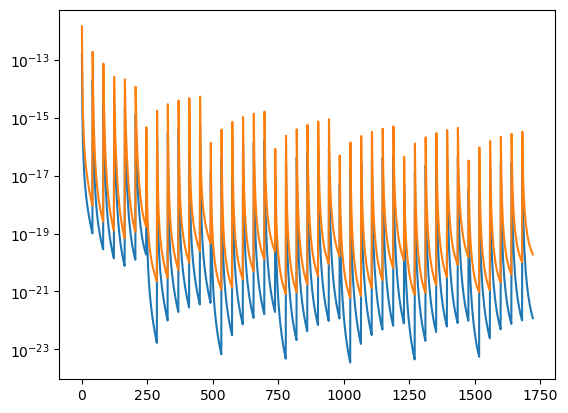

In [13]:
hdul = fits.open('../data/measurement/FS2_2x2_firstchain_fskycov_Cls_NS1024_LMIN10_BW50.fits')
cov_fsky = hdul['COVMAT'].data
hdul = fits.open('../data/measurement/FS2_2x2_firstchain_Cls_NS1024_LMIN10_BW50.fits')
cov_cutsky = hdul['COVMAT'].data

plt.figure()
plt.semilogy(np.diagonal(cov_fsky))
plt.semilogy(np.diagonal(cov_cutsky))
plt.show()

In [8]:
cov_cutsky.shape

(1722, 1722)

In [6]:
cov_fsky

array([[1.53730360e-13, 1.31877460e-15, 4.18256615e-17, ...,
        8.44182956e-27, 7.57790723e-27, 6.83007437e-27],
       [1.31877460e-15, 7.88207560e-15, 1.64491488e-16, ...,
        3.30428345e-27, 2.96350173e-27, 2.66998592e-27],
       [4.18256615e-17, 1.64491488e-16, 1.32820621e-15, ...,
        1.77098762e-27, 1.58674389e-27, 1.42892286e-27],
       ...,
       [8.44182956e-27, 3.30428345e-27, 1.77098762e-27, ...,
        1.39131277e-22, 7.96993735e-24, 4.82092457e-25],
       [7.57790723e-27, 2.96350173e-27, 1.58674389e-27, ...,
        7.96993735e-24, 1.28674179e-22, 7.37974720e-24],
       [6.83007437e-27, 2.66998592e-27, 1.42892286e-27, ...,
        4.82092457e-25, 7.37974720e-24, 1.19278878e-22]], dtype='>f8')